In [16]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



In [17]:
# x: Number of devices 
# Y: monthly Electric bill (USD)
# assume as linear regrassion

x_train=np.array([10,20,40,50,60,70])
y_train=np.array([30,53,88,111,130,148])
x_test=np.array([])
y_test=np.array([])
print("x_train :",x_train)
print("y_train :",y_train)


x_train : [10 20 40 50 60 70]
y_train : [ 30  53  88 111 130 148]


In [18]:
import random

# Generate and store the random values in an array
w = [random.randint(-50, 50) for i in range(1000)]
b = [random.randint(-50, 50) for i in range(1000)]

#print(w,"/n",b)



Text(0.5, 0, 'b')

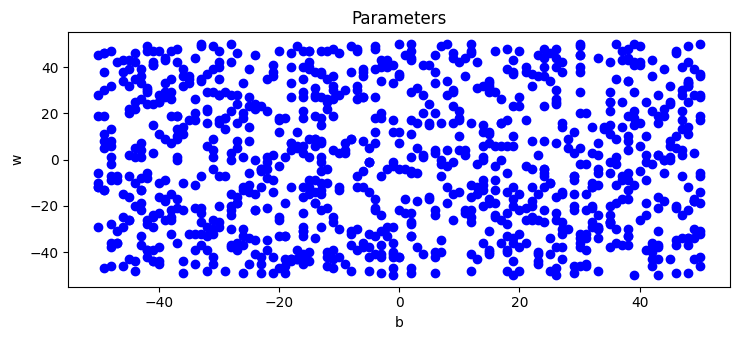

In [19]:

plt.scatter(w, b,c='b')
plt.title("Parameters")
plt.ylabel('w')
plt.xlabel('b')



Text(0.5, 0, 'Number of devices')

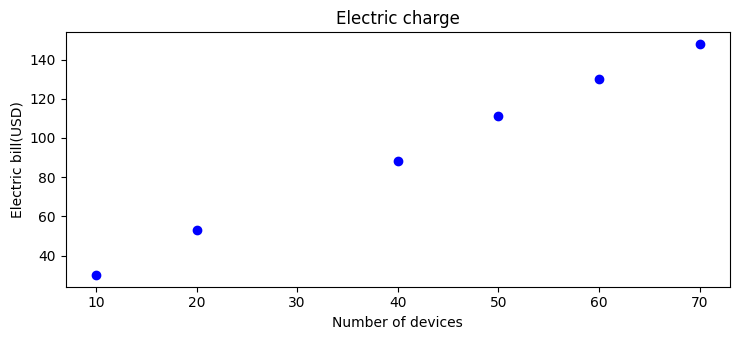

In [20]:
# Plot the data points
plt.scatter(x_train, y_train,c='b')
plt.title("Electric charge")
plt.ylabel('Electric bill(USD)')
plt.xlabel('Number of devices')



In [21]:
# defined Y^ (predcition value) for given w,b
def compute_model_prediction(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

# define cost funtion

def compute_cost(x, y, w, b): 
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [22]:
# let b=0 (when line cutting the root) so,  J(w,b) only depends on w
# value of W for each x
temp_w=[]
for i in w:
  temp_w.append(compute_model_prediction(x_train, i, 0))

#print(temp_w)




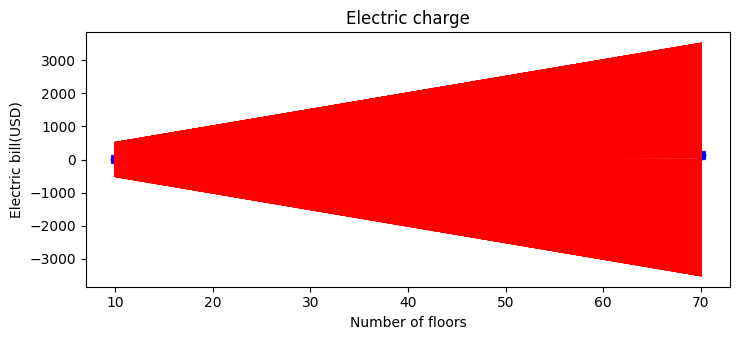

In [23]:

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='b',label='Actual Values')
plt.scatter(x_train, y_train,c='b')
plt.title("Electric charge")
plt.ylabel('Electric bill(USD)')
plt.xlabel('Number of floors')


# plot the prediction
for i in range(len(temp_w)):
  plt.plot(x_train, temp_w[i], c='r',label='Prediction')                     
                  
plt.show()                  
                   



In [24]:
# cost funtion for each w
temp_jwb=[]
for i in w:
  temp_jwb.append(compute_cost(x_train, y_train, i, 0))
#print(temp_jwb)


Text(0.5, 0, 'w')

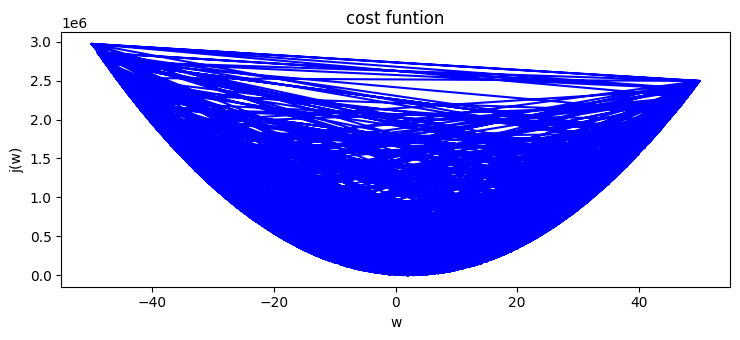

In [25]:

#print(w)
#print(b)
#print(temp_jwb)
# Plot j(w) vs w
plt.plot(w,temp_jwb,c='b')
plt.title("cost funtion")
plt.ylabel('j(w)')
plt.xlabel('w')


But here we have to consider parameter b as well 

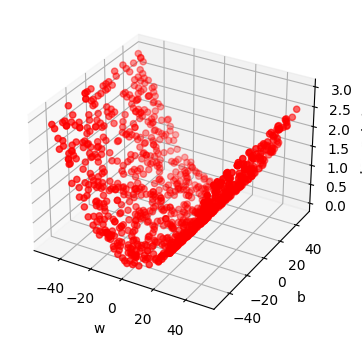

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(w, b, temp_jwb , c='r', marker='o')

# Adding labels to the x, y, and z axis
ax.set_xlabel('w')

ax.set_ylabel('b')
ax.set_zlabel('temp_jwb')

plt.show()



C:\Users\irsha\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


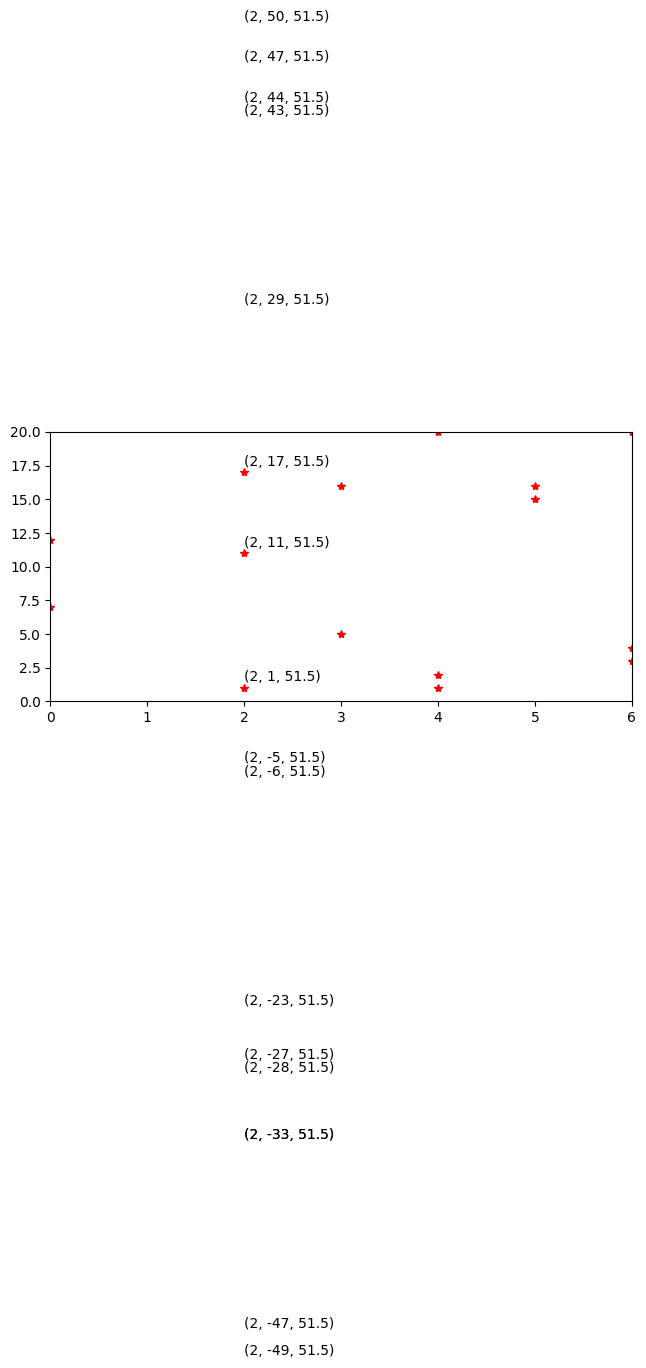

In [27]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.plot(w, b, 'r*')
plt.axis([0, 6, 0, 20])

for i, j,k in zip(w, b,temp_jwb):
  if k==min(temp_jwb):
    plt.text(i, j+0.5, '({}, {}, {})'.format(i, j,k))

plt.show()



We have to compute the b value for the minimum cost function.





The above value can be taken as the least mean square error by w, b.
Because w values are constant in this case, we can find the most efficient b value for each test case.




In [28]:
bOf_fwb=[]
for i,j,k in zip(w, b,temp_jwb):
  if k==min(temp_jwb):
    bOf_fwb.append(j)
print(bOf_fwb)

[-5, 29, -49, -6, 1, -33, 11, -27, 44, 47, 50, -23, -47, -28, 17, -33, 43]


In [29]:
#test accuracy for each b values
final_w=2
cost=[]
for b in bOf_fwb:
    cost.append(compute_cost(x_train, y_train, final_w, b))
print('cost:',cost)

#min cost => good accuracy

final_b=bOf_fwb[cost.index(min(cost))]

print("Perameter b :",final_b)

#so 

cost: [114.0, 182.0, 1742.0, 129.5, 42.0, 926.0, 2.0, 686.0, 579.5, 686.0, 801.5, 546.0, 1626.0, 723.5, 26.0, 926.0, 546.0]
Perameter b : 11


In [30]:

#our model is

def model(x):
    y=final_w*x+final_b
    #print("Y :",y)
    return y





In [31]:
# if x=80 then y=170
y=model(80)
print('Y:',y)



Y: 171
